In [1]:
import pandas as pd

base = pd.read_csv('./BankChurners.csv')

base.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [18]:
selected_columns = ['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Credit_Limit','Card_Category', 'Months_on_book', 'Total_Trans_Amt', 'Total_Trans_Ct']

filtered_data = base[selected_columns]

filtered_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Credit_Limit,Card_Category,Months_on_book,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,12691.0,Blue,39,1144,42
1,49,F,5,Graduate,Single,Less than $40K,8256.0,Blue,44,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,3418.0,Blue,36,1887,20
3,40,F,4,High School,Unknown,Less than $40K,3313.0,Blue,34,1171,20
4,40,M,3,Uneducated,Married,$60K - $80K,4716.0,Blue,21,816,28


In [33]:
Income_Category_trated = {
    "Less than $40K": 1,
    "$80K - $120K": 2,
    "Less than $40K": 3,
    "$60K - $80K": 4,
    '$40K - $60K' : 5, 
    '$120K +' : 6
}
Marital_Status_trated = {
    "Married":0,
    "Single": 1,
    "Divorced":2
}
Education_Level_trated = {
    'High School': 0,
    'Graduate': 1, 
    'Uneducated': 2,
    'College': 3,
    'Post-Graduate' : 4, 
    'Doctorate': 5
}
df_category = filtered_data['Income_Category'].replace(Income_Category_trated)
df_status = filtered_data['Marital_Status'].replace(Marital_Status_trated)
df_educatial = filtered_data['Education_Level'].replace(Education_Level_trated)

filtered_data['Income_Category'] = df_category
filtered_data['Marital_Status'] = df_status
filtered_data['Education_Level'] = df_educatial

filtered_data.replace("Unknown", -1, inplace=True)

filtered_data.head()

C:\Users\Rubeus\AppData\Local\Temp\ipykernel_11332\2589865407.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_category = filtered_data['Income_Category'].replace(Income_Category_trated)
C:\Users\Rubeus\AppData\Local\Temp\ipykernel_11332\2589865407.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Income_Category'] = df_category
C:\Users\Rubeus\AppData\Local\Temp\ipykernel_11332\2589865407.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Credit_Limit,Card_Category,Months_on_book,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,0,0,4,12691.0,Blue,39,1144,42
1,49,F,5,1,1,3,8256.0,Blue,44,1291,33
2,51,M,3,1,0,2,3418.0,Blue,36,1887,20
3,40,F,4,0,-1,3,3313.0,Blue,34,1171,20
4,40,M,3,2,0,4,4716.0,Blue,21,816,28


In [36]:
from sklearn.preprocessing import StandardScaler

data_encoded = pd.get_dummies(filtered_data, columns=['Gender', 'Marital_Status', 'Education_Level', 'Card_Category'])

scaler = StandardScaler()
data_encoder= scaler.fit_transform(data_encoded)

data_encoded.head()

,Customer_Age,Dependent_count,Income_Category,Credit_Limit,Months_on_book,Total_Trans_Amt,Total_Trans_Ct,Gender_F,Gender_M,Marital_Status_-1,...,Education_Level_0,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,4,12691.0,39,1144,42,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,49,5,3,8256.0,44,1291,33,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2,51,3,2,3418.0,36,1887,20,False,True,False,...,False,True,False,False,False,False,True,False,False,False
3,40,4,3,3313.0,34,1171,20,True,False,True,...,True,False,False,False,False,False,True,False,False,False
4,40,3,4,4716.0,21,816,28,False,True,False,...,False,False,True,False,False,False,True,False,False,False


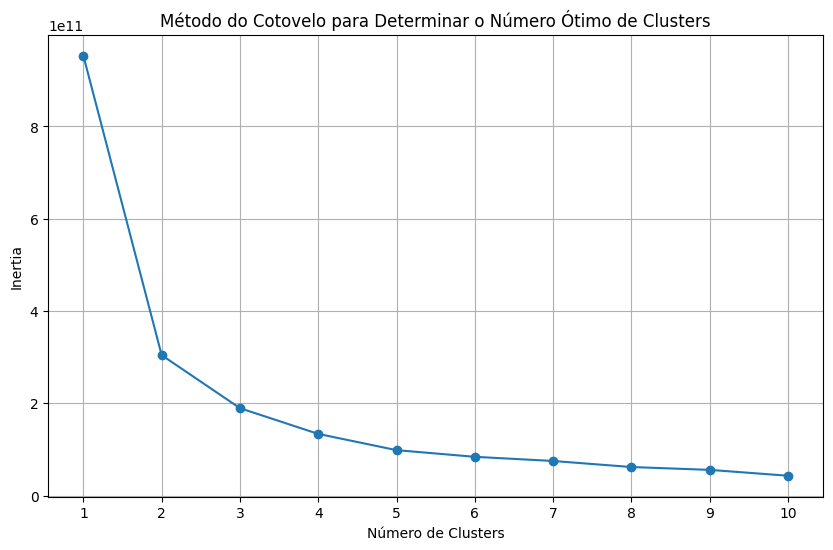

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [38]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_encoded)

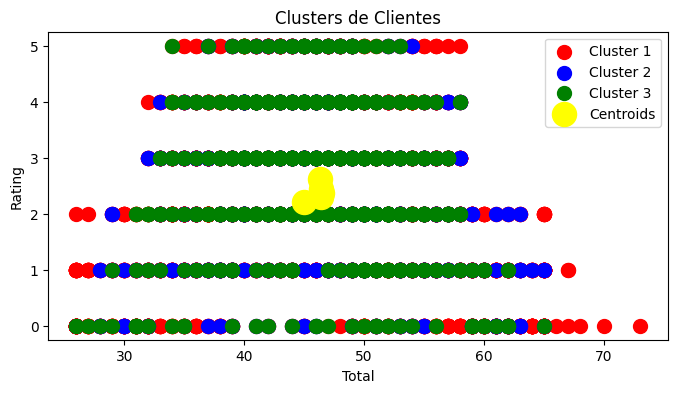

In [46]:
plt.figure(figsize=(8, 4))
plt.scatter(data_encoded.iloc[pred_y == 0, 0], data_encoded.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_encoded.iloc[pred_y == 1, 0], data_encoded.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_encoded.iloc[pred_y == 2, 0], data_encoded.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Total')
plt.ylabel('Rating')
plt.legend()
plt.show()
